# Binary Classification 
#### Create and train a machine learning model using the training set that performs well on the validation set depends on the metrics of "performance" 

##### Indeed using Jupyter Notebook; For better visualization


In [1]:
# Importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score,roc_curve,auc
import xgboost as xgb

pd.set_option('display.max_columns',100)
pd.set_option('display.max_row',10000)



# read dataset as dataframe 

In [2]:
df=pd.read_csv('training.csv',delimiter=';')
df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [3]:
df.shape

(3700, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   3661 non-null   object 
 1   variable2   3661 non-null   object 
 2   variable3   3700 non-null   object 
 3   variable4   3636 non-null   object 
 4   variable5   3636 non-null   object 
 5   variable6   3634 non-null   object 
 6   variable7   3634 non-null   object 
 7   variable8   3700 non-null   object 
 8   variable9   3700 non-null   object 
 9   variable10  3700 non-null   object 
 10  variable11  3700 non-null   int64  
 11  variable12  3700 non-null   object 
 12  variable13  3700 non-null   object 
 13  variable14  3600 non-null   float64
 14  variable15  3700 non-null   int64  
 15  variable17  3600 non-null   float64
 16  variable18  1555 non-null   object 
 17  variable19  3700 non-null   int64  
 18  classLabel  3700 non-null   object 
dtypes: float64(2), int64(3), ob

In [5]:
df.describe()

,variable11,variable14,variable15,variable17,variable19
count,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,4.160000,162.695000,2246.705946,1.626950e+06,0.925405
std,6.750553,156.045682,8708.571126,1.560457e+06,0.262772
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,2.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,6.000000,280.000000,1059.750000,2.800000e+06,1.000000
max,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


In [6]:
df['variable2']=df['variable2'].str.replace(',','.')
df['variable3']=df['variable3'].str.replace(',','.')
df['variable8']=df['variable8'].str.replace(',','.')


In [7]:
df['variable2']=df['variable2'].astype('float64')
df['variable3']=df['variable3'].astype('float64')
df['variable8']=df['variable8'].astype('float64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   3661 non-null   object 
 1   variable2   3661 non-null   float64
 2   variable3   3700 non-null   float64
 3   variable4   3636 non-null   object 
 4   variable5   3636 non-null   object 
 5   variable6   3634 non-null   object 
 6   variable7   3634 non-null   object 
 7   variable8   3700 non-null   float64
 8   variable9   3700 non-null   object 
 9   variable10  3700 non-null   object 
 10  variable11  3700 non-null   int64  
 11  variable12  3700 non-null   object 
 12  variable13  3700 non-null   object 
 13  variable14  3600 non-null   float64
 14  variable15  3700 non-null   int64  
 15  variable17  3600 non-null   float64
 16  variable18  1555 non-null   object 
 17  variable19  3700 non-null   int64  
 18  classLabel  3700 non-null   object 
dtypes: float64(5), int64(3), ob

[]

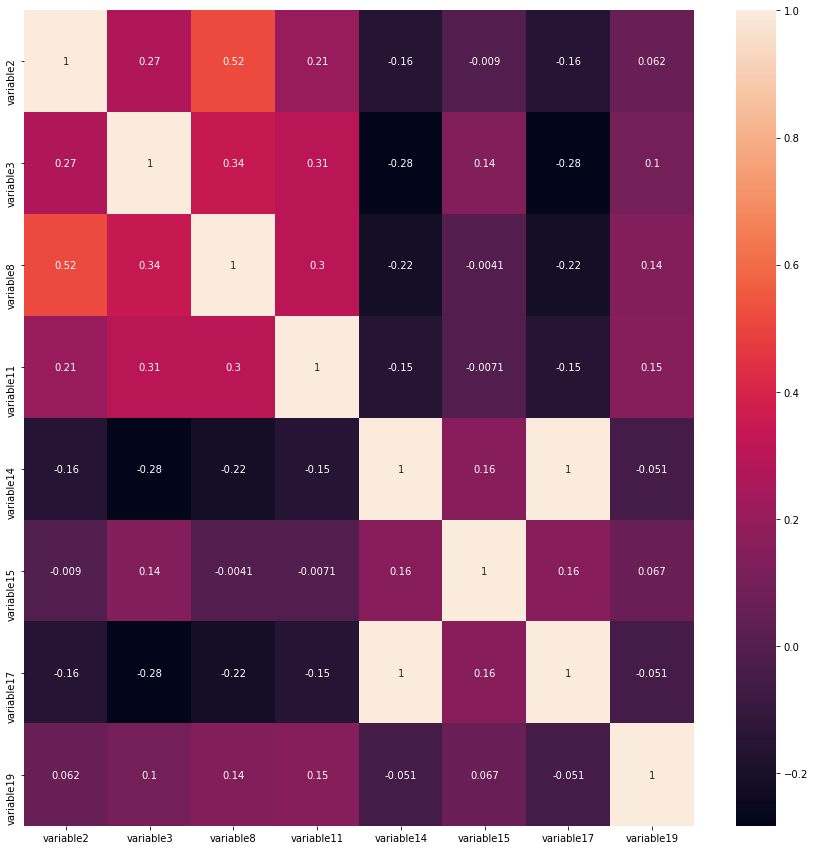

In [9]:
#plotting correlation matrix of our data features, to understabd it more
plt.figure(figsize=(15,15))
sns.heatmap(df.drop(columns=['classLabel']).corr(),annot=True)
plt.plot()

In [10]:
df.drop(columns=['classLabel']).corr()

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19
variable2,1.000000,0.272986,0.516952,0.207898,-0.156502,-0.008980,-0.156502,0.062068
variable3,0.272986,1.000000,0.343848,0.306006,-0.282650,0.141222,-0.282650,0.102007
variable8,0.516952,0.343848,1.000000,0.304266,-0.217329,-0.004123,-0.217329,0.141394
variable11,0.207898,0.306006,0.304266,1.000000,-0.153148,-0.007082,-0.153148,0.153039
variable14,-0.156502,-0.282650,-0.217329,-0.153148,1.000000,0.157323,1.000000,-0.051042
variable15,-0.008980,0.141222,-0.004123,-0.007082,0.157323,1.000000,0.157323,0.066893
variable17,-0.156502,-0.282650,-0.217329,-0.153148,1.000000,0.157323,1.000000,-0.051042
variable19,0.062068,0.102007,0.141394,0.153039,-0.051042,0.066893,-0.051042,1.000000


In [11]:
df.classLabel.value_counts()
#showing that our data is not balanced 

yes.    3424
no.      276
Name: classLabel, dtype: int64

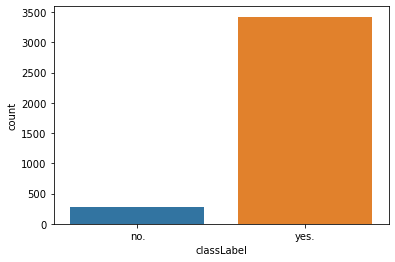

In [12]:
sns.countplot(x='classLabel',data=df)
#The records of 'no.'class is so much smaller in size than that of 'Yes' class

# check for Missing Values In Train Data & Deal With it

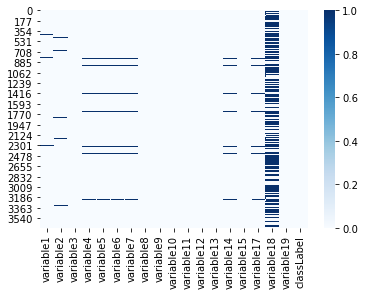

In [13]:
sns.heatmap(df.isnull(),cmap='Blues')

In [14]:
df.isnull().sum()

variable1       39
variable2       39
variable3        0
variable4       64
variable5       64
variable6       66
variable7       66
variable8        0
variable9        0
variable10       0
variable11       0
variable12       0
variable13       0
variable14     100
variable15       0
variable17     100
variable18    2145
variable19       0
classLabel       0
dtype: int64

In [15]:
# df.fillna(method='pad',axis=0,inplace=True)
df = df.fillna(df.mode().iloc[0])

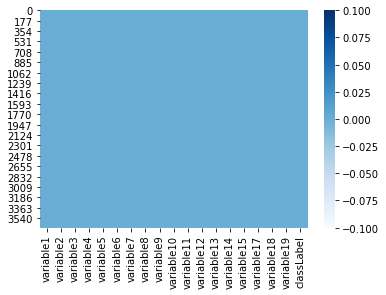

In [16]:
#recheck for missing values
sns.heatmap(df.isnull(),cmap='Blues')


In [17]:
df.isnull().sum()

variable1     0
variable2     0
variable3     0
variable4     0
variable5     0
variable6     0
variable7     0
variable8     0
variable9     0
variable10    0
variable11    0
variable12    0
variable13    0
variable14    0
variable15    0
variable17    0
variable18    0
variable19    0
classLabel    0
dtype: int64

# Load validation

In [18]:
df_val=pd.read_csv('validation.csv',delimiter=';')
df_val.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,"24,5","0,0013335",y,p,aa,v,"0,04",f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [19]:
df_val.shape

(200, 19)

In [20]:
df_val['variable2']=df_val['variable2'].str.replace(',','.')
df_val['variable3']=df_val['variable3'].str.replace(',','.')
df_val['variable8']=df_val['variable8'].str.replace(',','.')


In [21]:
df_val['variable2']=df_val['variable2'].astype('float64')
df_val['variable3']=df_val['variable3'].astype('float64')
df_val['variable8']=df_val['variable8'].astype('float64')

In [22]:
df_val.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,32.33,0.000750,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,23.58,0.000179,u,g,c,v,0.540,f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,36.42,0.000075,y,p,d,v,0.585,f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,18.42,0.001042,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,24.50,0.001334,y,p,aa,v,0.040,f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [23]:
df_val.classLabel.value_counts()
#showing that our data is not balanced 

no.     107
yes.     93
Name: classLabel, dtype: int64

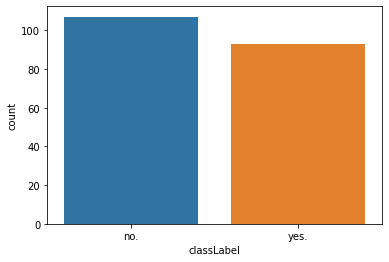

In [24]:
sns.countplot(x='classLabel',data=df_val)
#The records of 'no.'class is so relatevly more in size than that of 'Yes' class, and that completely contrast the case of our train set

  # Check for missing data in validationset

In [25]:
df_val.isnull().sum()

variable1       3
variable2       3
variable3       0
variable4       2
variable5       2
variable6       3
variable7       3
variable8       0
variable9       0
variable10      0
variable11      0
variable12      0
variable13      0
variable14      3
variable15      0
variable17      3
variable18    111
variable19      0
classLabel      0
dtype: int64

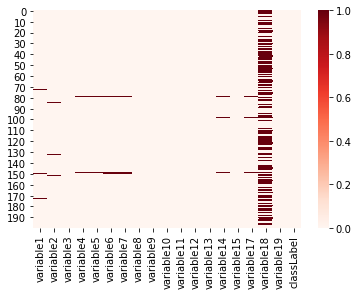

In [26]:
sns.heatmap(df_val.isnull(),cmap='Reds')

In [27]:
# df_val.fillna(method='pad',axis=0,inplace=True)
df_val = df.fillna(df_val.mode().iloc[0])

df_val.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,t,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,t,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [28]:
#to make sure that there are not any missing values
df_val.isnull().sum()

variable1     0
variable2     0
variable3     0
variable4     0
variable5     0
variable6     0
variable7     0
variable8     0
variable9     0
variable10    0
variable11    0
variable12    0
variable13    0
variable14    0
variable15    0
variable17    0
variable18    0
variable19    0
classLabel    0
dtype: int64

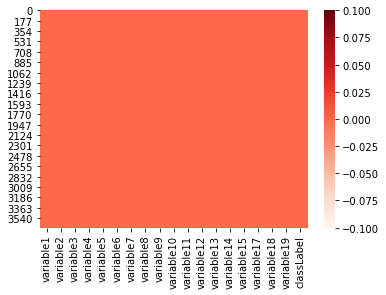

In [29]:
sns.heatmap(df_val.isnull(),cmap='Reds')

In [30]:
#As shown previously that filling data had fail with variable18 as first 4 record still nan
#we can drop them
df_val.dropna(inplace=True)
df.reindex().head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,t,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,t,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.


# Data Preprocessing: Deal With Non_Numerical Data In Train and Validation sets 
### Using Label_Encoder 

In [31]:
cols=df[['variable1', 'variable4', 'variable5', 'variable6' , 'variable7','variable9', 'variable10',
       'variable12', 'variable13', 'variable18','classLabel']]

label_encode=LabelEncoder()
for col in cols:
    label_encode.fit(pd.concat([df[col], df_val[col]], axis=0, sort=False))
    df[col] = label_encode.transform(df[col]) # this is the trianing set
    df_val[col] = label_encode.transform(df_val[col]) # this is the test set


## Showing Training Set After Encoding

In [32]:
df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,0,17.92,0.000054,1,0,2,7,1.750,0,1,1,1,0,80.0,5,800000.0,1,0,0
1,1,16.92,0.000034,2,2,9,7,0.290,0,0,0,0,2,200.0,0,2000000.0,1,0,0
2,1,31.25,0.000112,1,0,6,2,0.000,0,1,1,0,0,96.0,19,960000.0,1,0,0
3,0,48.17,0.000133,1,0,7,6,0.335,0,0,0,0,0,0.0,120,0.0,1,0,0
4,1,32.33,0.000350,1,0,9,7,0.500,0,0,0,1,0,232.0,0,2320000.0,0,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   3700 non-null   int32  
 1   variable2   3700 non-null   float64
 2   variable3   3700 non-null   float64
 3   variable4   3700 non-null   int32  
 4   variable5   3700 non-null   int32  
 5   variable6   3700 non-null   int32  
 6   variable7   3700 non-null   int32  
 7   variable8   3700 non-null   float64
 8   variable9   3700 non-null   int32  
 9   variable10  3700 non-null   int32  
 10  variable11  3700 non-null   int64  
 11  variable12  3700 non-null   int32  
 12  variable13  3700 non-null   int32  
 13  variable14  3700 non-null   float64
 14  variable15  3700 non-null   int64  
 15  variable17  3700 non-null   float64
 16  variable18  3700 non-null   int32  
 17  variable19  3700 non-null   int64  
 18  classLabel  3700 non-null   int32  
dtypes: float64(5), int32(11), i

### Showing Validation Set After Encoding 

In [34]:
#showing data after encoding
df_val.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,0,17.92,0.000054,1,0,2,7,1.750,0,1,1,1,0,80.0,5,800000.0,1,0,0
1,1,16.92,0.000034,2,2,9,7,0.290,0,0,0,0,2,200.0,0,2000000.0,1,0,0
2,1,31.25,0.000112,1,0,6,2,0.000,0,1,1,0,0,96.0,19,960000.0,1,0,0
3,0,48.17,0.000133,1,0,7,6,0.335,0,0,0,0,0,0.0,120,0.0,1,0,0
4,1,32.33,0.000350,1,0,9,7,0.500,0,0,0,1,0,232.0,0,2320000.0,0,0,0


In [35]:
# check that data type had changed
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3700 entries, 0 to 3699
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   3700 non-null   int32  
 1   variable2   3700 non-null   float64
 2   variable3   3700 non-null   float64
 3   variable4   3700 non-null   int32  
 4   variable5   3700 non-null   int32  
 5   variable6   3700 non-null   int32  
 6   variable7   3700 non-null   int32  
 7   variable8   3700 non-null   float64
 8   variable9   3700 non-null   int32  
 9   variable10  3700 non-null   int32  
 10  variable11  3700 non-null   int64  
 11  variable12  3700 non-null   int32  
 12  variable13  3700 non-null   int32  
 13  variable14  3700 non-null   float64
 14  variable15  3700 non-null   int64  
 15  variable17  3700 non-null   float64
 16  variable18  3700 non-null   int32  
 17  variable19  3700 non-null   int64  
 18  classLabel  3700 non-null   int32  
dtypes: float64(5), int32(11), i

# Divide Data To Features X & classlabel y (Train set)

In [36]:
X=np.array(df.drop(columns=['classLabel']))


In [37]:
y=np.array(df['classLabel'])


# Divide Data To Features X_val & classlabel y_val (Validation set)

In [38]:
X_val=np.array(df_val.drop(columns=['classLabel']))


In [39]:
y_val=np.array(df_val['classLabel'])


# spliting data to training set & testing set(80% training,20% testing)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,train_size=0.80,random_state=0)


# To Check Performance 
#### Create function generate_report to check performance by applying appropiate evaluation metrics for our models

In [41]:
def generate_report(y_true,y_pred):
    print("Accuracy Score"+" "+str(accuracy_score(y_true,y_pred)))# not the best to evaluate imbalanced dataset
    print('f1 Score'+' '+str(f1_score(y_true,y_pred)))#using mainly to evaluate imbalance dataset
    print("Recall score" + " "+str(recall_score(y_true,y_pred)))
    print('Precision Score'+" "+str(precision_score(y_true,y_pred)))
    pass
    

In [42]:
def generate_AUC_ROC_Curve(y_true,y_pred):
    '''
    Visualizing ROC CURVE 
    '''
    fpr, tpr, thresholds = roc_curve(y_true, y_pred,pos_label=1)
    plt.plot(fpr,tpr,label="Auc="+' '+str(auc(fpr, tpr)))
    plt.legend(loc=4)
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.show()
    pass

# Training Dataset Via ML Models
#### Having train dataset using ML algorithm that could handle the imbalance data problem as : Logistic Regression(giving the best result),Random Forest and Xgboosting , beside other ml algorithm as:KNN and Decision Tree 
### N.B: could use Resampling techinques to improve the reached accuracy of some ML Model as :Random Forest, Xgboosting and DecisionTree

# Training With xgboosting

In [43]:
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_pred=xgb_model.predict(x_test)

In [45]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,58,0
1,0,682


In [46]:
generate_report(y_test,y_pred)

Accuracy Score 1.0
f1 Score 1.0
Recall score 1.0
Precision Score 1.0


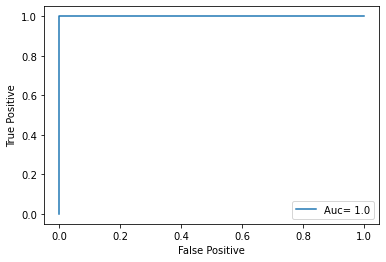

In [47]:
generate_AUC_ROC_Curve(y_test,y_pred)

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [48]:
val_pred=xgb_model.predict(X_val)

In [49]:
pd.DataFrame(confusion_matrix(y_val,val_pred))

,0,1
0,276,0
1,0,3424


In [50]:
generate_report(y_val,val_pred)

Accuracy Score 1.0
f1 Score 1.0
Recall score 1.0
Precision Score 1.0


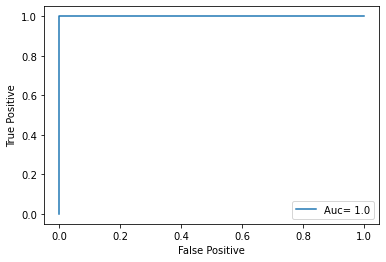

In [51]:
generate_AUC_ROC_Curve(y_val,val_pred)

# Train With Logistic Regression

In [52]:
lr_clf=LogisticRegression(class_weight='balanced')

In [53]:
lr_clf.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [54]:
y_pred=lr_clf.predict(x_test)

In [55]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,43,15
1,308,374


In [56]:
generate_report(y_test,y_pred)

Accuracy Score 0.5635135135135135
f1 Score 0.6984126984126984
Recall score 0.5483870967741935
Precision Score 0.961439588688946


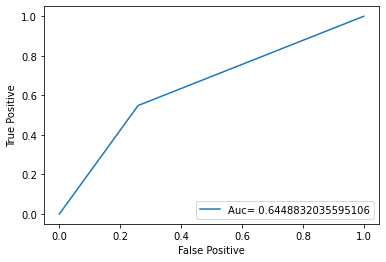

In [57]:
generate_AUC_ROC_Curve(y_test,y_pred)

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [58]:
val_pred=lr_clf.predict(X_val)

In [59]:
pd.DataFrame(confusion_matrix(y_val,val_pred))


,0,1
0,210,66
1,1552,1872


In [60]:
generate_report(y_val,val_pred)

Accuracy Score 0.5627027027027027
f1 Score 0.6982469227900037
Recall score 0.5467289719626168
Precision Score 0.9659442724458205


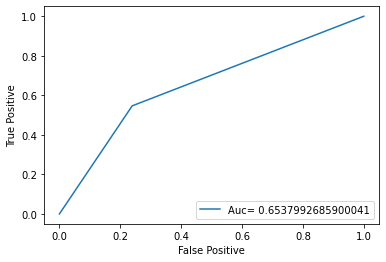

In [61]:
generate_AUC_ROC_Curve(y_val,val_pred)

# Random Forest Classification

In [62]:
clf= RandomForestClassifier(random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [63]:
y_pred=clf.predict(x_test)

In [64]:

pd.DataFrame(confusion_matrix(y_test,y_pred))




,0,1
0,58,0
1,0,682


In [65]:
generate_report(y_test,y_pred)

Accuracy Score 1.0
f1 Score 1.0
Recall score 1.0
Precision Score 1.0


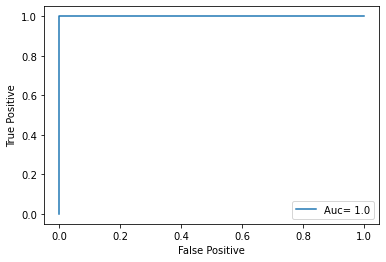

In [66]:
generate_AUC_ROC_Curve(y_test,y_pred)

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [67]:
val_pred=clf.predict(X_val)

In [68]:
pd.DataFrame(confusion_matrix(y_val,val_pred))


,0,1
0,276,0
1,0,3424


In [69]:
generate_report(y_val,val_pred)

Accuracy Score 1.0
f1 Score 1.0
Recall score 1.0
Precision Score 1.0


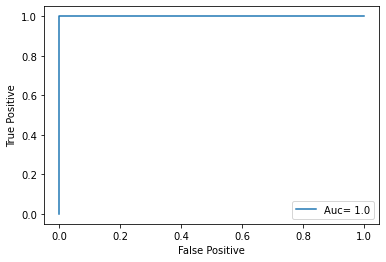

In [70]:
generate_AUC_ROC_Curve(y_val,val_pred)

# Decision Tree

In [71]:
clf_dt=DecisionTreeClassifier()

In [72]:
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
dt_pred=clf_dt.predict(x_test)


In [74]:
pd.DataFrame(confusion_matrix(y_test,dt_pred))

,0,1
0,58,0
1,0,682


In [75]:
generate_report(y_test,dt_pred)

Accuracy Score 1.0
f1 Score 1.0
Recall score 1.0
Precision Score 1.0


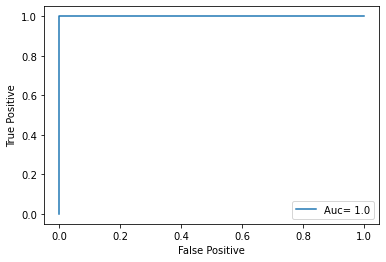

In [76]:
generate_AUC_ROC_Curve(y_test,dt_pred)

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [77]:
val_pred=clf_dt.predict(X_val)

In [78]:
pd.DataFrame(confusion_matrix(y_val,val_pred))

,0,1
0,276,0
1,0,3424


In [79]:
generate_report(y_val,val_pred)

Accuracy Score 1.0
f1 Score 1.0
Recall score 1.0
Precision Score 1.0


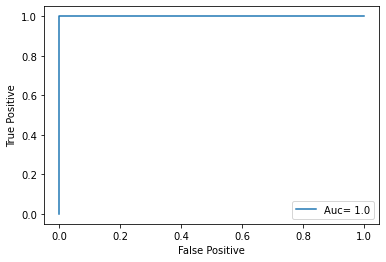

In [80]:
generate_AUC_ROC_Curve(y_val,val_pred)

# K Nearest Neighbors

In [81]:
#using scaling techniques for better accuracy
from sklearn.preprocessing import Binarizer
scaler=Binarizer()
scale_train=scaler.fit_transform(x_train)
scale_test=scaler.transform(x_test)
scale_val=scaler.transform(X_val)

In [82]:
clf_knn= KNeighborsClassifier()

In [83]:
clf_knn.fit(scale_train,y_train)

KNeighborsClassifier()

In [84]:
y_pred=clf_knn.predict(scale_test)

In [85]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,55,3
1,0,682


In [86]:
generate_report(y_test,y_pred)

Accuracy Score 0.995945945945946
f1 Score 0.9978054133138259
Recall score 1.0
Precision Score 0.9956204379562044


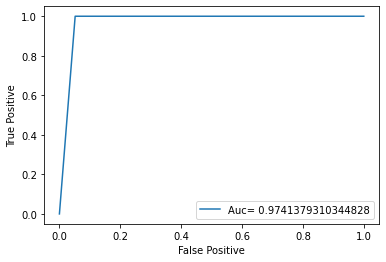

In [87]:
generate_AUC_ROC_Curve(y_test,y_pred)

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [88]:
val_pred=clf_knn.predict(scale_val)

In [89]:
pd.DataFrame(confusion_matrix(y_val,val_pred))

,0,1
0,250,26
1,0,3424


In [90]:
generate_report(y_val,val_pred)

Accuracy Score 0.9929729729729729
f1 Score 0.9962176316555136
Recall score 1.0
Precision Score 0.9924637681159421


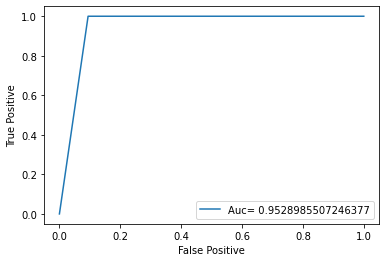

In [91]:
generate_AUC_ROC_Curve(y_val,val_pred)